Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Aral Cimcim | k11720457 | 27.04.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &ndash; Drug Discovery (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Schimunek, J. Brandstetter, E. Kobler<br>
<b>Date:</b> 18-04-2023

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u3_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u3_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u3_utils as u3

# Import additional utilities needed in this notebook.
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from rdkit import Chem

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u3.setup_jupyter()

# Check minimum versions.
u3.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.24.2 (✓)
Installed pandas version: 1.5.3 (✓)
Installed scikit-learn version: 1.2.1 (✓)
Installed matplotlib version: 3.7.1 (✓)
Installed seaborn version: 0.12.2 (✓)
Installed PIL version: 9.4.0 (✓)
Installed rdkit version: 2022.09.5 (✓)


<h2>Extracting Information of MOL/SDF Representations</h2>
<p>The first step of working with molecule data is actually getting them into memory. <tt>RDKit</tt> provides this functionality with <code>SDMolSupplier</code> – be aware that the specified file is <i>not</i> loaded at once, but piece by piece, depending on what information is retrieved. This behavior is solely for performance reasons, hence you do not need to worry about this besides <i>not</i> deleting/moving the specified data file during the whole process.</p>

<div class="alert alert-warning">
    <b>Exercise 1.1. [15 Points]</b>
    <ul>
        <li>Load the <i>molecule</i> data set <tt>molecules.sdf</tt> using the appropriate function as supplied by <tt>RDKit</tt>.</li>
        <li>To avoid any problems with the <i>lazy</i> loading mechanics of <tt>RDKit</tt>, print the total amount of loaded molecules.</li>
        <li>Visualize the $8$ molecules with the <i>lowest LogP</i> values in a <i>$2\times 3$ grid</i> including their <i>Formulas</i> as well as their <i>LogP</i> values.</li>
        <li>What does the acronym <i>LogP</i> stand for? Which property do the extracted molecules share? Cite your sources (find an appropriate source, even if you know it by heart).</li>
    </ul>
</div>

The total amount of loaded molecules are: 218


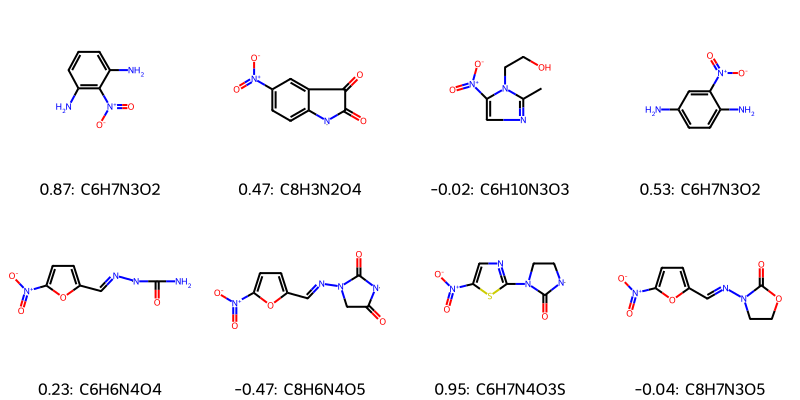

In [3]:
# Load the molecule data set
data_molecules = Chem.SDMolSupplier("resources/molecules.sdf")

# Print the total amount of loaded molecules
molecules_len = len(data_molecules)
print(f"The total amount of loaded molecules are: {molecules_len}")

# Visualize 8 molecules with the lowest LogP values in a 2 * 4 grid with their formulas and LogP values

# Inspect the content of all LogP values
# for mol in data_molecules:
#     print(mol.GetProp("LogP"))

# Found: 16, 69, 147, 175, 215, 216, 217, 218 as the lowest LogP values

# Create a subset of fouund molecules
data_molecules_subset = [data_molecules[15], data_molecules[68], data_molecules[146], data_molecules[174], data_molecules[214], data_molecules[215], data_molecules[216], data_molecules[217]]

# Set the Labels to plot
data_molecules_subset_labels = [f'{mol.GetProp("LogP")}: {mol.GetProp("Formula")}' for mol in data_molecules_subset]

# Plot the subset with labels in a grid plot.
Chem.Draw.MolsToGridImage(
    data_molecules_subset,
    legends=data_molecules_subset_labels,
    maxMols=len(data_molecules_subset),
    molsPerRow=4
)

# The acronym LogP stands for the partition coefficient of the concentration relationship between e.g. the octanol phase and water phase. [1]

# [1] Plante, J., Werner, S. JPlogP: an improved logP predictor trained using predicted data. J Cheminform 10, 61 (2018). https://doi.org/10.1186/s13321-018-0316-5

# Almost all of them are used to treat infections (other than 2-nitro-m-phenylenediamine, 5-nitroisatin, and 2-nitro-p-phenylenediamine)
# All molecules have ring structures, either with 5 or with 6 atoms.

<div class="alert alert-warning">
    <b>Exercise 1.2. [10 Points]</b>
    <ul>
        <li>For each of the previously found molecules, <i>annote</i> each atom by its degree and compute each molecule's <i>atom count</i>.</li>
        <li>Visualize the result in a <i> $2\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>atom counts</i> (sorted in descending order according to <i>atom count</i>).</li>
        <li>Do you observe <i>visually similar</i> molecules? In either case, comment on their respective differences.</li>
    </ul>
</div>

In [4]:
def annotate_molecule_atoms(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
        atom.SetProp('atomNote', str(atom.GetIdx()))
    return molecule_annotated

Atom 0 in C6H7N3O2 has degree 3
Atom 1 in C6H7N3O2 has degree 3
Atom 2 in C6H7N3O2 has degree 3
Atom 3 in C6H7N3O2 has degree 2
Atom 4 in C6H7N3O2 has degree 2
Atom 5 in C6H7N3O2 has degree 2
Atom 6 in C6H7N3O2 has degree 1
Atom 7 in C6H7N3O2 has degree 1
Atom 8 in C6H7N3O2 has degree 3
Atom 9 in C6H7N3O2 has degree 1
Atom 10 in C6H7N3O2 has degree 1
Atom 0 in C8H3N2O4 has degree 3
Atom 1 in C8H3N2O4 has degree 2
Atom 2 in C8H3N2O4 has degree 2
Atom 3 in C8H3N2O4 has degree 3
Atom 4 in C8H3N2O4 has degree 3
Atom 5 in C8H3N2O4 has degree 2
Atom 6 in C8H3N2O4 has degree 2
Atom 7 in C8H3N2O4 has degree 3
Atom 8 in C8H3N2O4 has degree 3
Atom 9 in C8H3N2O4 has degree 1
Atom 10 in C8H3N2O4 has degree 1
Atom 11 in C8H3N2O4 has degree 3
Atom 12 in C8H3N2O4 has degree 1
Atom 13 in C8H3N2O4 has degree 1
Atom 0 in C6H10N3O3 has degree 3
Atom 1 in C6H10N3O3 has degree 2
Atom 2 in C6H10N3O3 has degree 3
Atom 3 in C6H10N3O3 has degree 3
Atom 4 in C6H10N3O3 has degree 2
Atom 5 in C6H10N3O3 has degree

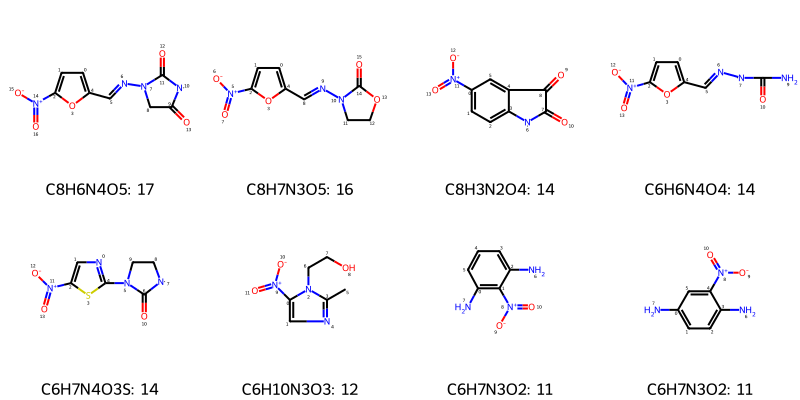

In [5]:
# Call the annotate_molecule_atoms function for the subset
data_molecules_subset_annotated = [annotate_molecule_atoms(mol) for mol in data_molecules_subset]

# Compute each atom count
for mol in data_molecules_subset_annotated:
    for atom in mol.GetAtoms():
        print(f'Atom {atom.GetIdx()} in {mol.GetProp("Formula")} has degree {atom.GetDegree()}')

# Sort the subset by atom counts in descending order
data_molecules_subset_annotated_sorted = sorted(data_molecules_subset_annotated, key=lambda mol: mol.GetNumAtoms(), reverse=True)

# Set the Labels to plot
data_molecules_subset_annotated_sorted_labels = [f'{mol.GetProp("Formula")}: {mol.GetNumAtoms()}' for mol in data_molecules_subset_annotated_sorted]

# Plot the subset with labels in a grid plot.
Chem.Draw.MolsToGridImage(
    data_molecules_subset_annotated_sorted,
    legends=data_molecules_subset_annotated_sorted_labels,
    maxMols=len(data_molecules_subset_annotated_sorted),
    molsPerRow=4
)

# The molecular geometry of C8H6N4O5, C8H7N3O5 and C6H7N4O3 are very similar with different O configurations. Last 2 molecules (2-nitro-p-phenylenediamine) have the same formula with different O bonds.

<h2>Atomic Properties and Bonds</h2>
<p>Extracting <i>atomic</i> as well as <i>bond</i> properties often allows for a more thorough undertstanding of the molecules at hand. Unsurprisingly, <tt>RDKit</tt> provides the necessary functionality for this purpose – almost. The missing functionality may be taken from the exercise notebook, but needs to be adapted accordingly.</p>

<div class="alert alert-warning">
    <b>Exercise 2.1. [10 Points]</b>
    <ul>
        <li>Compute the <i>amount of atoms</i> participating in a <i>ring structure</i> for each of the molecules of the previous exercise.</li>
        <li>Adapt and apply <code>annotate_molecule_atoms</code> in a way to annotate an atom with an <tt>R</tt> if it is <i>participating</i> in a ring structure.</li>
        <li>Visualize the result in a <i> $2\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>amount of ring atoms</i> (sorted in descending order according to the latter).</li>
    </ul>
</div>

Atom  0 in C6H7N3O2 is     in a ring.
Atom  1 in C6H7N3O2 is     in a ring.
Atom  2 in C6H7N3O2 is     in a ring.
Atom  3 in C6H7N3O2 is     in a ring.
Atom  4 in C6H7N3O2 is     in a ring.
Atom  5 in C6H7N3O2 is     in a ring.
Atom  6 in C6H7N3O2 is not in a ring.
Atom  7 in C6H7N3O2 is not in a ring.
Atom  8 in C6H7N3O2 is not in a ring.
Atom  9 in C6H7N3O2 is not in a ring.
Atom 10 in C6H7N3O2 is not in a ring.
Atom  0 in C8H3N2O4 is     in a ring.
Atom  1 in C8H3N2O4 is     in a ring.
Atom  2 in C8H3N2O4 is     in a ring.
Atom  3 in C8H3N2O4 is     in a ring.
Atom  4 in C8H3N2O4 is     in a ring.
Atom  5 in C8H3N2O4 is     in a ring.
Atom  6 in C8H3N2O4 is     in a ring.
Atom  7 in C8H3N2O4 is     in a ring.
Atom  8 in C8H3N2O4 is     in a ring.
Atom  9 in C8H3N2O4 is not in a ring.
Atom 10 in C8H3N2O4 is not in a ring.
Atom 11 in C8H3N2O4 is not in a ring.
Atom 12 in C8H3N2O4 is not in a ring.
Atom 13 in C8H3N2O4 is not in a ring.
Atom  0 in C6H10N3O3 is     in a ring.
Atom  1 in 

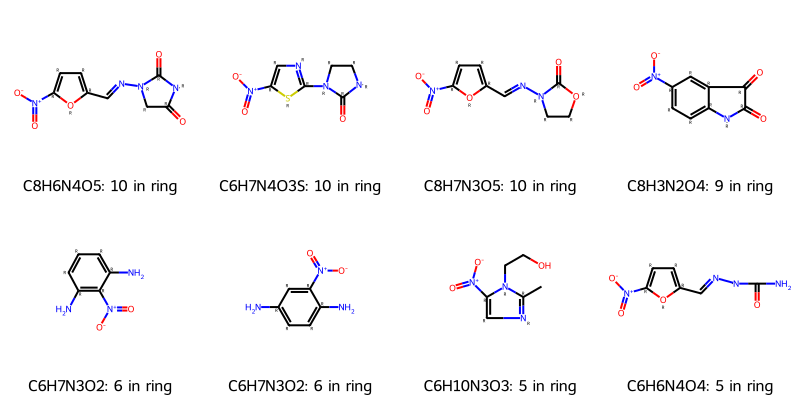

In [6]:
# Compute the amount of atoms that create a ring for each mol
for mol in data_molecules_subset:
    for atom in mol.GetAtoms():
        print(f'Atom {atom.GetIdx():>2} in {mol.GetProp("Formula")} is {"" if atom.IsInRing() else "not ":>4}in a ring.')

# Add an R to the mol if ring structure is found
def annotate_molecule_atoms_R(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with an R if the atom is in a ring
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
        if atom.IsInRing():
            atom.SetProp("atomNote", "R")
    return molecule_annotated

# Call the annotate_molecule_atoms_R function for the subset
data_molecules_subset_annotated_R = [annotate_molecule_atoms_R(mol) for mol in data_molecules_subset]

# Print the total nr. of atoms that create a ring
for mol in data_molecules_subset_annotated_R:
    ring_atoms = []
    for atom in mol.GetAtoms():
        if atom.IsInRing():
            ring_atoms.append(atom)
    print(f'{mol.GetProp("Formula")} has {len(ring_atoms)} atoms that create a ring.')

# Sort the subset by the total number of ring atoms in descending order
data_molecules_subset_annotated_R_sorted = sorted(data_molecules_subset_annotated_R, key=lambda mol: len([atom for atom in mol.GetAtoms() if atom.IsInRing()]), reverse=True)

# Set the Labels to plot
data_molecules_subset_annotated_R_sorted_labels = [f'{mol.GetProp("Formula")}: {len([atom for atom in mol.GetAtoms() if atom.IsInRing()])} in ring' for mol in data_molecules_subset_annotated_R_sorted]

# Plot the subset with labels in a grid plot.
Chem.Draw.MolsToGridImage(
    data_molecules_subset_annotated_R_sorted,
    legends=data_molecules_subset_annotated_R_sorted_labels,
    maxMols=len(data_molecules_subset_annotated_R_sorted),
    molsPerRow=4
)

# Test # 
# Chem.Draw.MolToImage(data_molecules_subset_annotated_R[0])


<div class="alert alert-warning">
    <b>Exercise 2.2. [10 Points]</b>
    <ul>
        <li>Compute the <i>amount of double-type bonds</i> for each of the molecules of the previous exercise.</li>
        <li>Adapt and apply <code>annotate_molecule_bonds</code> in a way to mark bonds with the <i>first letter</i> of their respective <i>type</i>.</li>
        <li>Visualize the result in a <i> $2\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>amount of double bonds</i> (sorted in descending order according to the latter).</li>
    </ul>
</div>

C6H7N3O2 has 1 double bond.
C8H3N2O4 has 3 double bonds.
C6H10N3O3 has 1 double bond.
C6H7N3O2 has 1 double bond.
C6H6N4O4 has 3 double bonds.
C8H6N4O5 has 4 double bonds.
C6H7N4O3S has 2 double bonds.
C8H7N3O5 has 3 double bonds.


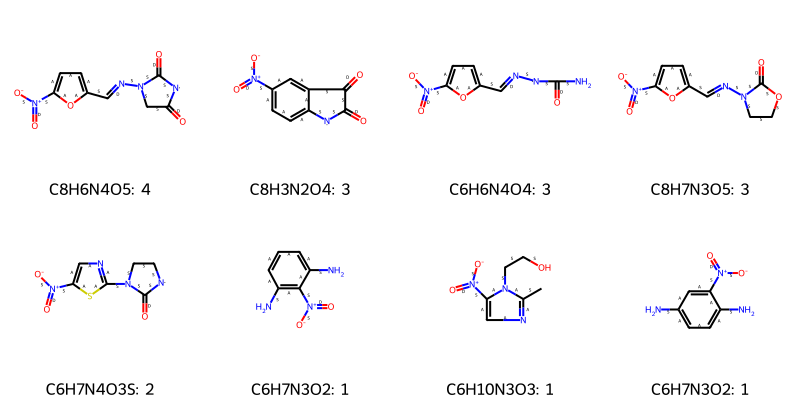

In [7]:
# Compute the amount of double-type bonds for each mol
for mol in data_molecules_subset:
    double_bonds = []
    for bond in mol.GetBonds():
        if bond.GetBondTypeAsDouble() == 2:
            double_bonds.append(bond)
    if len(double_bonds) == 0:
        print(f'{mol.GetProp("Formula")} has no double bonds.')
    elif len(double_bonds) == 1:
        print(f'{mol.GetProp("Formula")} has 1 double bond.')
    else:
        print(f'{mol.GetProp("Formula")} has {len(double_bonds)} double bonds.')

# # Test the bond types
# molecule = data_molecules_subset[7]
# # Print the total nr. of double bonds in the last mol
# double_bonds = []
# for bond in molecule.GetBonds():
#     if bond.GetBondTypeAsDouble() == 2:
#         double_bonds.append(bond)

# Test GetBondTypeAsDouble() // Working with rdchem.Bondtype // # 

# Adapt the annotate_molecule_atoms function
def annotate_molecule_Bonds(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate bonds with the first letter of their type
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for bond in molecule_annotated.GetBonds():
        # If aromatic
        if bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            bond.SetProp("bondNote", "A")
        # If single
        elif bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            bond.SetProp("bondNote", "S")
        # If double
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            bond.SetProp("bondNote", "D")
        # If tirple
        elif bond.GetBondType() == Chem.rdchem.BondType.TRIPLE:
            bond.SetProp("bondNote", "T")
        # Unknown
        else:
            bond.SetProp("bondNote", "U")

    return molecule_annotated

# Call the annotate_molecule_Bonds function
data_molecules_subset_annotated_bonds = [annotate_molecule_Bonds(mol) for mol in data_molecules_subset]

# Sort the subset for total nr of double bonds
data_molecules_subset_annotated_bonds_sorted = sorted(data_molecules_subset_annotated_bonds, key=lambda mol: len([bond for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() == 2]), reverse=True)

# Set the Labels to plot
data_molecules_subset_annotated_bonds_sorted_labels = [f'{mol.GetProp("Formula")}: {len([bond for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() == 2])}' for mol in data_molecules_subset_annotated_bonds_sorted]

# Plot the subset with labels in a grid plot.
Chem.Draw.MolsToGridImage(
    data_molecules_subset_annotated_bonds_sorted,
    legends=data_molecules_subset_annotated_bonds_sorted_labels,
    maxMols=len(data_molecules_subset_annotated_bonds_sorted),
    molsPerRow=4
)

<h2>Further Applications</h2>
<p>In the following exercises, you'll have to dig into the more interesting applications of chemoinformatics, namely:
<ul>
    <li>molecular substructure matching</li>
    <li>molecular fingerprints</li>
    <li>molecular clustering</li>
</ul></p>

<div class="alert alert-warning">
    <b>Exercise 3.1. [10 Points]</b>
    <ul>
        <li>Specify a <tt>CCO</tt> template and scan the full molecules data set. Visualize the template including a respective <i>atom numbering</i>.</li>
        <li>For each of the found molecules, <i>annote</i> their atoms and compute their respective <i>substructure matches</i> (w.r.t. <tt>CCO</tt>).</li>
        <li>Visualize the result in a <i>grid</i> including their <i>substructure matches</i>. Can you recognize the substructures in the plot?</li>
    </ul>
</div>

The amount of molecules that match the CCO template is: 12

C15H11NO4 with 20 atoms matches the template
C20H13NO4 with 25 atoms matches the template
C20H13NO4 with 25 atoms matches the template
C8H9NO3 with 12 atoms matches the template
C6H10N3O3 with 12 atoms matches the template
C18H11NO4 with 23 atoms matches the template
C14H11NO4 with 19 atoms matches the template
C14H11NO4 with 19 atoms matches the template
C18H13NO4 with 23 atoms matches the template
C18H13NO4 with 23 atoms matches the template
C20H15NO3 with 24 atoms matches the template
C8H7N3O5 with 16 atoms matches the template
The substructure matches for C15H11NO4:
(19, 17, 16)
The substructure matches for C20H13NO4:
(0, 5, 20)
(1, 0, 21)
(4, 5, 20)
(5, 0, 21)
The substructure matches for C20H13NO4:
(0, 1, 20)
(1, 2, 21)
(2, 1, 20)
(3, 2, 21)
The substructure matches for C8H9NO3:
(11, 10, 9)
The substructure matches for C6H10N3O3:
(6, 7, 8)
The substructure matches for C18H11NO4:
(22, 20, 19)
The substructure matches for 

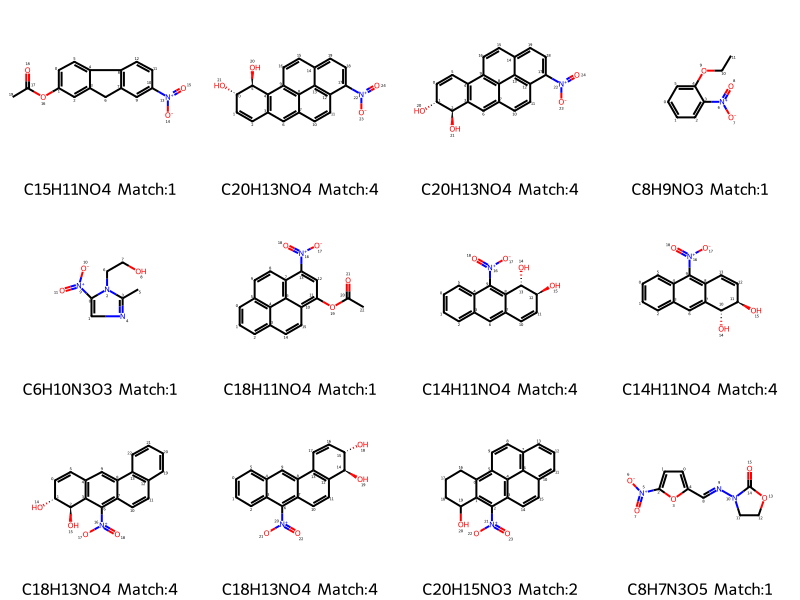

In [29]:
# Specify the CCO template
CCO_template = Chem.MolFromSmiles("CCO")

# Create a list of mols that match the template
CCO_matches = [mol for mol in data_molecules if mol.HasSubstructMatch(CCO_template)]

# Print the number of mols
print(f"The amount of molecules that match the CCO template is: {len(CCO_matches)}\n")

## Using GetSubstructMatch returns only the first one ##

# Print the names of the mols that match the CCO template
for mol in CCO_matches:
    print(f"{mol.GetProp('Formula')} with {mol.GetNumAtoms()} atoms matches the template")

# Annotate the atoms in the found mols
CCO_matches_annotated = [annotate_molecule_atoms(mol) for mol in CCO_matches]

# Find the substructure matches for each mol
for mol in CCO_matches_annotated:
    print(f"The substructure matches for {mol.GetProp('Formula')}:")
    for match in mol.GetSubstructMatches(CCO_template):
        print(f'{match}')

# Set the Labels to plot
CCO_matches_annotated_labels = [f'{mol.GetProp("Formula")} Match:{len(mol.GetSubstructMatches(CCO_template))}' for mol in CCO_matches_annotated]

# Plot the subset with labels in a grid plot.
Chem.Draw.MolsToGridImage(
    CCO_matches_annotated,
    legends=CCO_matches_annotated_labels,
    maxMols=len(CCO_matches_annotated),
    molsPerRow=4
)

# They seem to be indicating multiple 'OH' connections

<div class="alert alert-warning">
    <b>Exercise 3.2. [20 Points]</b>
    <ul>
        <li>Compute the <i>ECFPs</i> from the previously found molecules and visualize them in tabular form (use a <i>fold size</i> of $256$).</li>
        <li>How many <i>substructures</i> are present in each molecule? Compute and sort their <i>total amount</i> for each molecule.</li>
    </ul>
</div>

In [26]:
# Compute ECPFs in tabular form
data_molecules_smiles = [Chem.MolToSmiles(molecule) for molecule in CCO_matches_annotated]

data_molecules_ecfps = u3.compute_ecfps(data_molecules_smiles, fold=256)
data_molecules_ecfps

# Find how many substructure matches there are for each mol
pd.DataFrame(data_molecules_ecfps.sum(axis=1)).transpose()

# Total numbers: 45 56 52 29 34 46 45 43 52 52 51 40

,0,1,2,3,4,5,6,7,8,9,10,11
0,45,56,52,29,34,46,45,43,52,52,51,40


<div class="alert alert-warning">
    <b>Exercise 3.3. [25 Points]</b>
    <ul>
        <li>Downproject the previously computed <i>ECFPs</i> using <i>t-SNE</i> (use a seed of $42$, and a perplexity of $3.0$).</li>
        <li>Visualize the result in a <i>scatter plot</i>. Are there any visible clusters?</li>
            <li>Cluster the resulting downprojections using <i>affinity propagation</i>. Why would <i>k-means</i> be a little bit disadvantageous here?</li>
        <li>Plot all molecules of all <i>clusters</i> in separate <i>grids</i> including their <i>Compound Name</i> and <i>LogP</i>. Do you see similarities?</li>
    </ul>
</div>

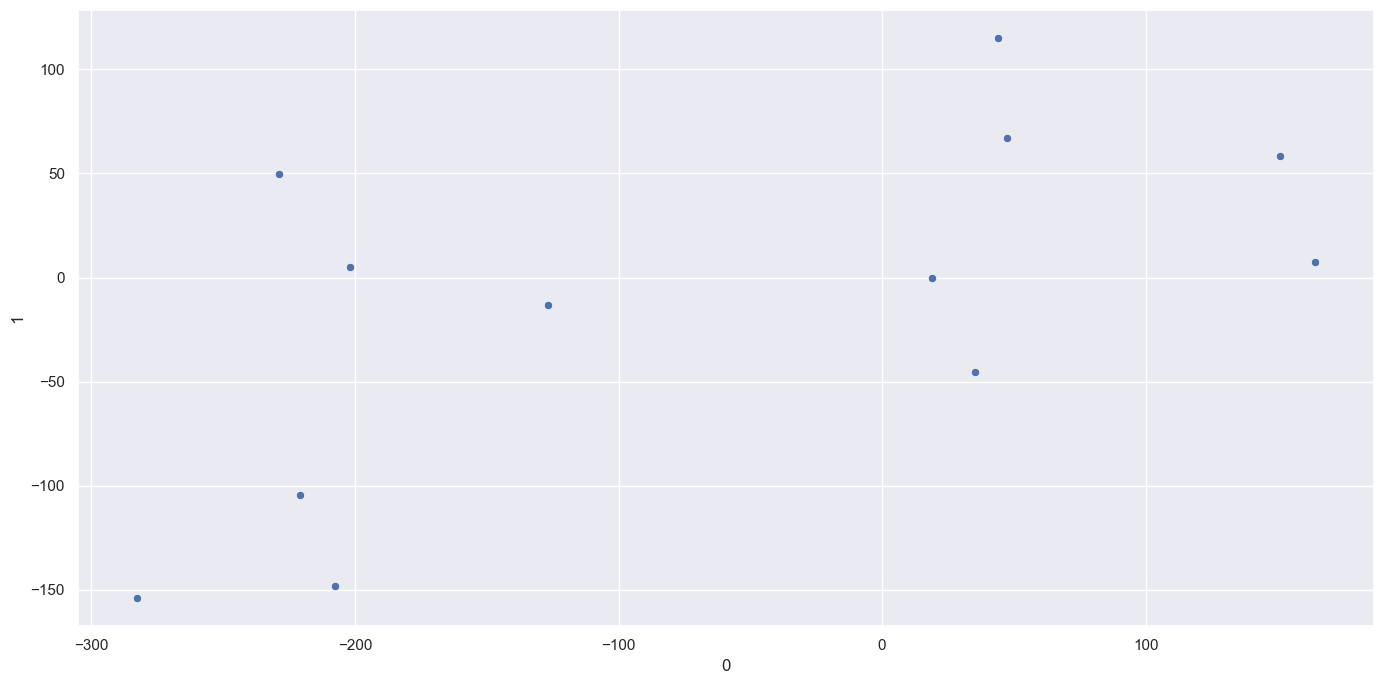

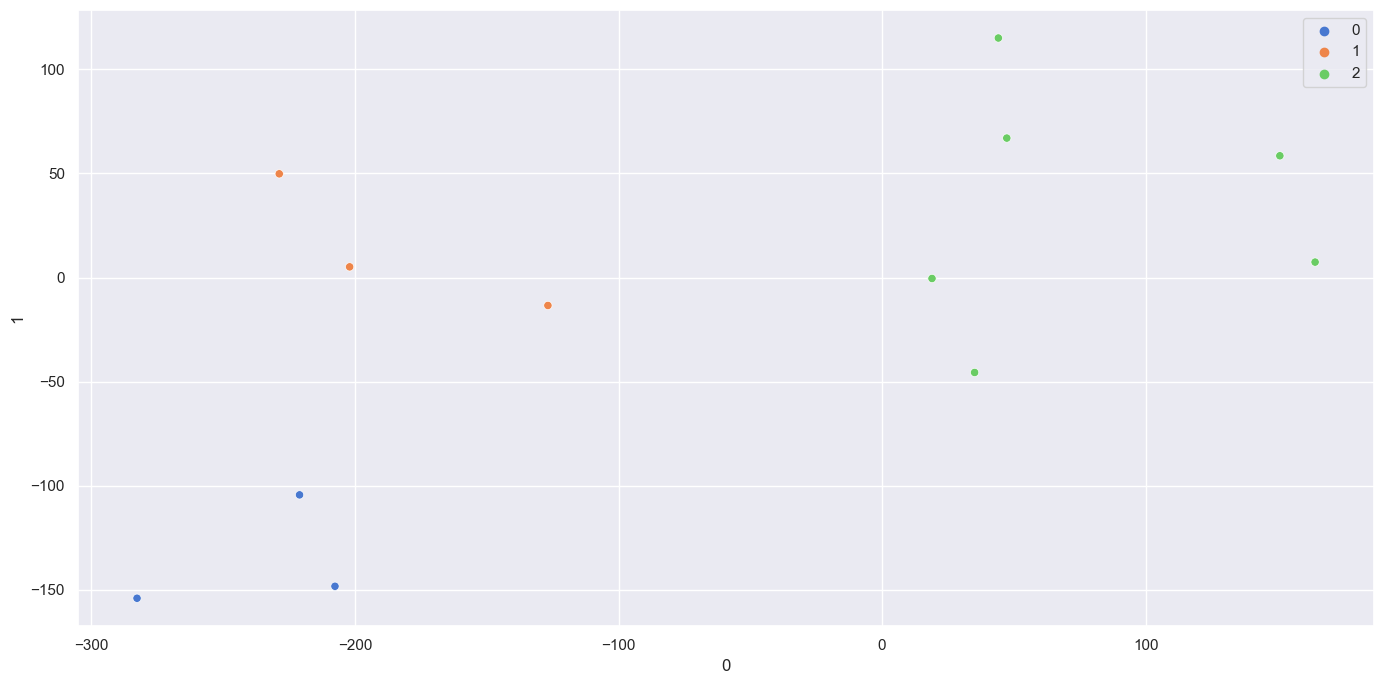

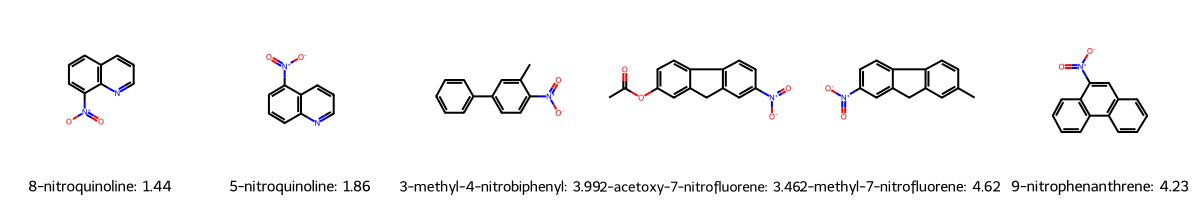

In [28]:
# Set seed
np.random.seed(seed=42)

# Downproject the ECFPs with t-SNE
data_molecules_ecfps_tsne = u3.apply_tsne(n_components=2, data=data_molecules_ecfps, perplexity=3)
u3.plot_points_2d(data=data_molecules_ecfps_tsne, figsize=(14, 7))

# Cluster the downprojections with affinity propagation
affinity_prop_clusters_tsne = u3.apply_affinity_propagation(data=data_molecules_ecfps_tsne)
u3.plot_points_2d(data=data_molecules_ecfps_tsne, targets=affinity_prop_clusters_tsne, figsize=(14, 7))

# Plot all clusters in separate grids for Compound Name and LogP
cluster_indices = data_molecules_ecfps_tsne[affinity_prop_clusters_tsne == 2].index
cluster_molecules = [data_molecules[i] for i in cluster_indices]
cluster_molecule_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("LogP")}' for mol in cluster_molecules]

Chem.Draw.MolsToGridImage(
    cluster_molecules,
    legends=cluster_molecule_labels,
    maxMols=len(cluster_molecules),
    molsPerRow=6
)

# k means clustering would work better when clusters have a sphere-like shape, t-SNE would work better for non-linearities.
# Almost all molecules have double rings.